# Project 3 Assignment

## Assignment Overview & Instructions

The objective of project 3 is to perform keyword network analysis and word frequency
analysis.  
Please complete the following 7 tasks in this assessment, using the instructions indicated below.   

**Note:** You may create your own custom functions if necessary to complete the tasks.

### Task 1: Import the Dataset for use in your Notebook.   

You can find the source dataset [here](https://drive.google.com/file/d/1YJe45YXo0xSkFClGPBhKYLzupFEyGadK/view?usp=sharing)

In [3]:
## YOUR CODE HERE

import pandas as pd

df = pd.read_csv('keywords_data.csv')

df

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Subsidiary Staffing in Multinational Enterpris...,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,"Strategic Human Resource Practices, Top Manage...",PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,Compensation Policy and Organizational Perform...,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,"Functional Background Identity, Diversity, and...",CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


### **Task 2:**  Write a Python code to extract keyword data from the above file. 
Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix. See the figure below to understand the process

![Task Two - Adjacency matrix](Task%202%20-%20Figure%201.png)

In [309]:
df1 = df.drop('Title', axis=1)
df1

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


In [121]:
## YOUR CODE HERE
import nltk
import string
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df2 = df1.values.tolist()

In [135]:
# extract key words in each row and create a list
keywords = []

for row in df2:
    row = [item.lower() if isinstance(item, str) else item for item in row] # if the item is str then it will be lowercased, else will remain.
    keywords.append(row) #lowercase words in each tuple, then this will remain the tuple formation.

In [244]:
# Create co-occurrence pairs with weights
co_occurrence_pairs = []
for document in keywords:
    co_occurrence_pairs.append([(document[i], document[j]) for i in range(len(document)) for j in range(i + 1, len(document))])

from collections import Counter

adj_matrix = Counter()

for doc in co_occurrence_pairs:
    weighted_co_occurrences = nltk.FreqDist(doc)
    for pair in weighted_co_occurrences.keys():
        adj_matrix[pair] +=  weighted_co_occurrences[pair]

adj_matrix

Counter({(nan, nan): 1185,
         ('organizational behavior', nan): 32,
         ('organizational structure', nan): 25,
         ('organizational effectiveness', nan): 21,
         ('decision making', nan): 20,
         ('management science', nan): 18,
         ('personnel management', nan): 17,
         ('industrial management', nan): 15,
         ('organizational sociology', nan): 14,
         ('corporate governance', nan): 14,
         ('new products', nan): 12,
         ('employee motivation', nan): 11,
         ('teams in the workplace', nan): 10,
         ('executive ability (management)', nan): 9,
         ('organizational behavior', 'organizational effectiveness'): 9,
         ('incentives in industry', nan): 9,
         ('strategic planning', nan): 8,
         ('investments', nan): 8,
         ('executive compensation', nan): 8,
         ('interpersonal relations', nan): 8,
         ('organizational behavior', 'organizational structure'): 8,
         ('executives', nan): 8,


### **Task 3:**  Read the adjacency matrix and convert it into a weighted network

In [230]:
# YOUR CODE HERE

# Build the weighted co-occurrence network
G = nx.Graph()

for (word1, word2), weight in adj_matrix.items():
    G.add_edge(word1, word2, weight=weight)

node = len(G) #the number of node equals with the number of weighted graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge = len(edge_weights)

print(f"Network created with {node} nodes and {edge} edges")

Network created with 249 nodes and 2342 edges


### **Task 4:**  Compute node degree and strength

In [242]:
## YOUR CODE HERE
node_metrics = {}
for node in G.nodes():
    degree = G.degree(node)
    strength = sum(data['weight'] for another_node, data in G[node].items()) #G[node].items() shows all the neighbor nodes and their weight that this node links in.
    
    node_metrics[node] = {
        'degree': degree,
        'strength': strength
    }
    
    #to create a dictionary to contain output of each node in the loop.
node_metrics

{nan: {'degree': 202, 'strength': 1917},
 'equity': {'degree': 11, 'strength': 11},
 'organizational sociology': {'degree': 67, 'strength': 93},
 'performance': {'degree': 24, 'strength': 31},
 'meta-analysis': {'degree': 11, 'strength': 11},
 'psychometrics': {'degree': 11, 'strength': 11},
 'organizational research': {'degree': 25, 'strength': 32},
 'financial performance': {'degree': 20, 'strength': 21},
 'agency theory': {'degree': 39, 'strength': 48},
 'organizational effectiveness': {'degree': 105, 'strength': 153},
 'organizational behavior': {'degree': 167, 'strength': 245},
 'corporate governance': {'degree': 63, 'strength': 87},
 'diversification in industry': {'degree': 19, 'strength': 22},
 'business planning': {'degree': 30, 'strength': 33},
 'performance standards': {'degree': 10, 'strength': 11},
 'employees -- rating of': {'degree': 10, 'strength': 11},
 'corporate culture': {'degree': 10, 'strength': 11},
 'strategic planning': {'degree': 67, 'strength': 84},
 'managem

In [301]:
metrics_df = pd.DataFrame.from_dict(node_metrics, orient='index').reset_index() 
# without reset_index(), we cannot rename the column, and the format of the columns' name will be wrong.

metrics_df.columns = ['keyword', 'degree', 'strength'] #convert dictionary into dataframe.
metrics_df

,keyword,degree,strength
0,NaN,202,1917
1,equity,11,11
2,organizational sociology,67,93
3,performance,24,31
4,meta-analysis,11,11
...,...,...,...
244,customer relations,11,11
245,production management,11,11
246,labor process,11,11
247,customer orientation,11,11


### **Task 5:**  Show the top 10 nodes by degree and top 10 nodes by strength

In [302]:
## YOUR CODE HERE
metrics_df_degree = metrics_df.sort_values('degree', ascending=False)
metrics_df_degree.head(10)

,keyword,degree,strength
0,NaN,202,1917
10,organizational behavior,167,245
9,organizational effectiveness,105,153
18,management science,103,141
34,personnel management,94,125
44,decision making,91,121
67,organizational structure,75,113
2,organizational sociology,67,93
17,strategic planning,67,84
70,industrial management,65,87


In [303]:
metrics_df_strength = metrics_df.sort_values('strength', ascending=False)
metrics_df_strength

,keyword,degree,strength
0,NaN,202,1917
10,organizational behavior,167,245
9,organizational effectiveness,105,153
18,management science,103,141
34,personnel management,94,125
...,...,...,...
119,organizational justice,11,11
121,violence in the workplace,11,11
122,anger in the workplace,11,11
123,problem employees,11,11


### **Task 6:** Show the top 10 node pairs by weight

In [248]:
## YOUR CODE HERE
df_pair = {}
for (word1, word2), weight in adj_matrix.items():    
    df_pair[(word1, word2)] = {
        'weight': weight,
    }

df_pair

{(nan, nan): {'weight': 1185},
 ('equity', 'organizational sociology'): {'weight': 1},
 ('equity', 'performance'): {'weight': 1},
 ('equity', 'meta-analysis'): {'weight': 1},
 ('equity', 'psychometrics'): {'weight': 1},
 ('equity', 'organizational research'): {'weight': 1},
 ('equity', 'financial performance'): {'weight': 1},
 ('equity', 'agency theory'): {'weight': 1},
 ('equity', 'organizational effectiveness'): {'weight': 1},
 ('equity', 'organizational behavior'): {'weight': 1},
 ('equity', 'corporate governance'): {'weight': 1},
 ('equity', nan): {'weight': 1},
 ('organizational sociology', 'performance'): {'weight': 1},
 ('organizational sociology', 'meta-analysis'): {'weight': 1},
 ('organizational sociology', 'psychometrics'): {'weight': 1},
 ('organizational sociology', 'organizational research'): {'weight': 2},
 ('organizational sociology', 'financial performance'): {'weight': 1},
 ('organizational sociology', 'agency theory'): {'weight': 2},
 ('organizational sociology', 'or

In [279]:
df_pair_weight = (
    pd.DataFrame.from_dict(df_pair, orient='index')
      .reset_index()
)

df_pair_weight.columns = ['word1', 'word2', 'weight'] #by this step to rename each column, else we the first two columns don't have name.

df_pair_weight

,word1,word2,weight
0,NaN,NaN,1185
1,equity,organizational sociology,1
2,equity,performance,1
3,equity,meta-analysis,1
4,equity,psychometrics,1
...,...,...,...
2431,decision making,customer orientation,1
2432,decision making,marketing strategy,1
2433,customer satisfaction,customer orientation,1
2434,customer satisfaction,marketing strategy,1


In [268]:
df_pair_weight_top = df_pair_weight.sort_values('weight', ascending=False)
df_pair_weight_top.head(10)

,word1,word2,weight
0,NaN,NaN,1185
65,organizational behavior,NaN,32
454,organizational structure,NaN,25
63,organizational effectiveness,NaN,21
409,decision making,NaN,20
117,management science,NaN,18
214,personnel management,NaN,17
467,industrial management,NaN,15
66,corporate governance,NaN,14
21,organizational sociology,NaN,14


In [287]:
df_pair_weight_top1=df_pair_weight_top.dropna()

df_pair_weight_top1.head(10)

,word1,word2,weight
399,organizational behavior,organizational effectiveness,9
449,organizational behavior,organizational structure,8
275,management science,organizational behavior,7
1132,teams in the workplace,organizational sociology,5
1082,personnel management,organizational behavior,4
209,personnel management,management science,4
2062,organizational behavior,management,4
287,corporate governance,organizational behavior,4
1480,organizational behavior,personnel management,4
217,management science,executive ability (management),3


### **Task 7:** Plot strength on y-axis and degree on x-axis

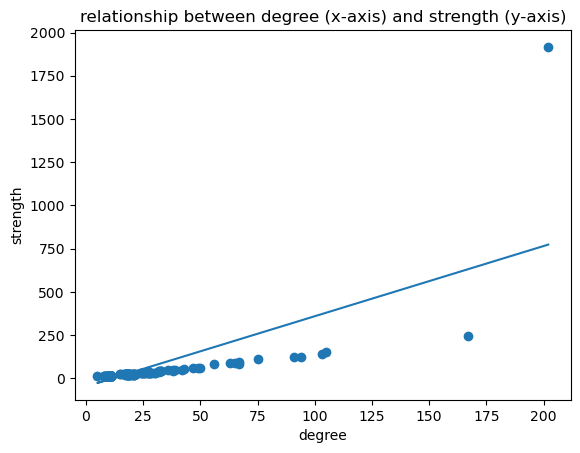

In [304]:
## YOUR CODE HERE
import numpy as np

plt.scatter(metrics_df.degree, metrics_df.strength)

m, b = np.polyfit(metrics_df.degree, metrics_df.strength, 1)

plt.plot(metrics_df.degree, m*metrics_df.degree + b)

plt.title("relationship between degree (x-axis) and strength (y-axis)")
plt.xlabel("degree")
plt.ylabel("strength")
plt.show()

In [306]:
metrics_df1 = metrics_df.dropna()
metrics_df1.head(10)

,keyword,degree,strength
1,equity,11,11
2,organizational sociology,67,93
3,performance,24,31
4,meta-analysis,11,11
5,psychometrics,11,11
6,organizational research,25,32
7,financial performance,20,21
8,agency theory,39,48
9,organizational effectiveness,105,153
10,organizational behavior,167,245


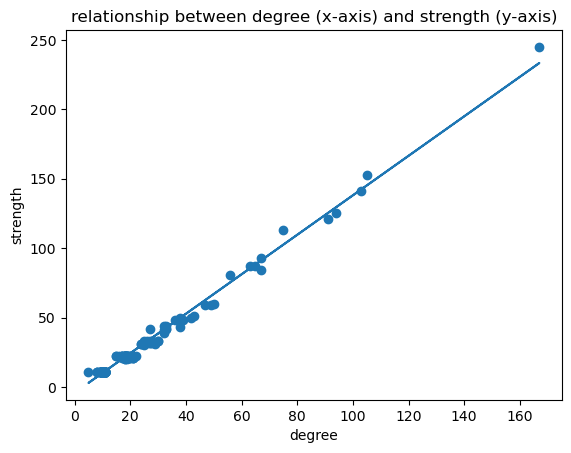

In [307]:


plt.scatter(metrics_df1.degree, metrics_df1.strength)

m, b = np.polyfit(metrics_df1.degree, metrics_df1.strength, 1)

plt.plot(metrics_df1.degree, m*metrics_df1.degree + b)

plt.title("relationship between degree (x-axis) and strength (y-axis)")
plt.xlabel("degree")
plt.ylabel("strength")
plt.show()

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 3.ipynb` to the following Staff Graded Assignment for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 3 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 3.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 3" by the deadline indicated within your course view for the Project 3 Assignment item.

Congratulations on completing the Project 3 Assignment!